In [176]:
!pip install citipy

mkl-random 1.0.1 requires cython, which is not installed.
mkl-fft 1.0.0 requires cython, which is not installed.


## Importing Dependencies & reading the CSV file

In [177]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import date

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [178]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

## Variable Declaration

In [179]:
api_key = api_keys.api_key

# Starting URL for Weather Map API Call. FRAMING THE URL
url_part1 = "http://api.openweathermap.org/data/2.5/weather?q="
url_part2 = "&APPID="
url_part3 = api_key

#Todays date
today = str(date.today())

#Creating Empty Datframe
city_data_df = pd.DataFrame()

## Perform API Calls

In [180]:
#OpenWeatherMap API Key
#Calling the "Open Weather Map API"

i = 1
set = 1

print("Beginning Data Retrieval")
print("----------------------------")

#Iterate the "cities" list, and pass it as a paramaeter to the Open Weather Map API.
for city in cities:
    if(i == 50):
        set =  set + 1
        i = 0
        time.sleep(60)
    #Calling the API, with the URL link formed in parts, with "city" as input
    url = url_part1 + city + url_part2 + url_part3
    response = requests.get(url).json()
    #If the response code is not 200, then the API is not retrieving the response for that City
    if(response["cod"] == 200):
        print("Processing record "+ str(i) + " of Set " + str(set) + " | " + city)
        i = i + 1
        print(url)
        city_data_df = city_data_df.append({ "City"       : response["name"], 
                                             "Cloudiness" : response["clouds"]["all"],
                                             "Country"    : response["sys"]["country"],
                                             "Date"       : response["dt"],
                                             "Lat"        : response["coord"]["lat"],
                                             "Long"       : response["coord"]["lon"],
                                             "Max Temp"   : response["main"]["temp_max"],
                                             "Temp"       : response["main"]["temp"],
                                             "Humidity"   : response["main"]["humidity"],
                                             "Wind Speed" : response["wind"]["speed"],}, ignore_index=True)
        
    else:
        citiesNotFoundinAPI.append(city)

Beginning Data Retrieval
----------------------------
Processing record 1 of Set 1 | port hardy
http://api.openweathermap.org/data/2.5/weather?q=port hardy&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 2 of Set 1 | new norfolk
http://api.openweathermap.org/data/2.5/weather?q=new norfolk&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 3 of Set 1 | khatanga
http://api.openweathermap.org/data/2.5/weather?q=khatanga&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 4 of Set 1 | atambua
http://api.openweathermap.org/data/2.5/weather?q=atambua&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 5 of Set 1 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 6 of Set 1 | tongren
http://api.openweathermap.org/data/2.5/weather?q=tongren&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 7 of Set 1 | faya
http://api.openweathermap.org/data/2.5/weather?q=faya&APPID=eadd9c0c4b24ab

Processing record 10 of Set 2 | sambalpur
http://api.openweathermap.org/data/2.5/weather?q=sambalpur&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 11 of Set 2 | waingapu
http://api.openweathermap.org/data/2.5/weather?q=waingapu&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 12 of Set 2 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 13 of Set 2 | nizhneudinsk
http://api.openweathermap.org/data/2.5/weather?q=nizhneudinsk&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 14 of Set 2 | baghdad
http://api.openweathermap.org/data/2.5/weather?q=baghdad&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 15 of Set 2 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?q=port elizabeth&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 16 of Set 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?q=bredasdorp&APPID=eadd9c0c4b24ab1d3715077be52522b

Processing record 20 of Set 3 | penzance
http://api.openweathermap.org/data/2.5/weather?q=penzance&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 21 of Set 3 | polyarnyy
http://api.openweathermap.org/data/2.5/weather?q=polyarnyy&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 22 of Set 3 | mount isa
http://api.openweathermap.org/data/2.5/weather?q=mount isa&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 23 of Set 3 | cidreira
http://api.openweathermap.org/data/2.5/weather?q=cidreira&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 24 of Set 3 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 25 of Set 3 | ketchikan
http://api.openweathermap.org/data/2.5/weather?q=ketchikan&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 26 of Set 3 | tupik
http://api.openweathermap.org/data/2.5/weather?q=tupik&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 27 of Se

Processing record 31 of Set 4 | sudbury
http://api.openweathermap.org/data/2.5/weather?q=sudbury&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 32 of Set 4 | merauke
http://api.openweathermap.org/data/2.5/weather?q=merauke&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 33 of Set 4 | bonthe
http://api.openweathermap.org/data/2.5/weather?q=bonthe&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 34 of Set 4 | salalah
http://api.openweathermap.org/data/2.5/weather?q=salalah&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 35 of Set 4 | karratha
http://api.openweathermap.org/data/2.5/weather?q=karratha&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 36 of Set 4 | port-cartier
http://api.openweathermap.org/data/2.5/weather?q=port-cartier&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 37 of Set 4 | krasnovishersk
http://api.openweathermap.org/data/2.5/weather?q=krasnovishersk&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 38 of 

Processing record 41 of Set 5 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?q=vila franca do campo&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 42 of Set 5 | athabasca
http://api.openweathermap.org/data/2.5/weather?q=athabasca&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 43 of Set 5 | quincy
http://api.openweathermap.org/data/2.5/weather?q=quincy&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 44 of Set 5 | yarada
http://api.openweathermap.org/data/2.5/weather?q=yarada&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 45 of Set 5 | hamilton
http://api.openweathermap.org/data/2.5/weather?q=hamilton&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 46 of Set 5 | hasaki
http://api.openweathermap.org/data/2.5/weather?q=hasaki&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 47 of Set 5 | mirandela
http://api.openweathermap.org/data/2.5/weather?q=mirandela&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 

Processing record 0 of Set 7 | zabaykalsk
http://api.openweathermap.org/data/2.5/weather?q=zabaykalsk&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 1 of Set 7 | alofi
http://api.openweathermap.org/data/2.5/weather?q=alofi&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 2 of Set 7 | vardo
http://api.openweathermap.org/data/2.5/weather?q=vardo&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 3 of Set 7 | coruripe
http://api.openweathermap.org/data/2.5/weather?q=coruripe&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 4 of Set 7 | graaff-reinet
http://api.openweathermap.org/data/2.5/weather?q=graaff-reinet&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 5 of Set 7 | inhambane
http://api.openweathermap.org/data/2.5/weather?q=inhambane&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 6 of Set 7 | maloy
http://api.openweathermap.org/data/2.5/weather?q=maloy&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 7 of Set 7 | anahuac
http

Processing record 10 of Set 8 | acapulco
http://api.openweathermap.org/data/2.5/weather?q=acapulco&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 11 of Set 8 | te anau
http://api.openweathermap.org/data/2.5/weather?q=te anau&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 12 of Set 8 | aldan
http://api.openweathermap.org/data/2.5/weather?q=aldan&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 13 of Set 8 | bonavista
http://api.openweathermap.org/data/2.5/weather?q=bonavista&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 14 of Set 8 | lalmohan
http://api.openweathermap.org/data/2.5/weather?q=lalmohan&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 15 of Set 8 | ovsyanka
http://api.openweathermap.org/data/2.5/weather?q=ovsyanka&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 16 of Set 8 | motala
http://api.openweathermap.org/data/2.5/weather?q=motala&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 17 of Set 8 | visnes
http:

Processing record 20 of Set 9 | sirsa
http://api.openweathermap.org/data/2.5/weather?q=sirsa&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 21 of Set 9 | sosnovo-ozerskoye
http://api.openweathermap.org/data/2.5/weather?q=sosnovo-ozerskoye&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 22 of Set 9 | onega
http://api.openweathermap.org/data/2.5/weather?q=onega&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 23 of Set 9 | valdivia
http://api.openweathermap.org/data/2.5/weather?q=valdivia&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 24 of Set 9 | hualmay
http://api.openweathermap.org/data/2.5/weather?q=hualmay&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 25 of Set 9 | talaya
http://api.openweathermap.org/data/2.5/weather?q=talaya&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 26 of Set 9 | floro
http://api.openweathermap.org/data/2.5/weather?q=floro&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 27 of Set 9 | tautira


Processing record 30 of Set 10 | tigil
http://api.openweathermap.org/data/2.5/weather?q=tigil&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 31 of Set 10 | alta gracia
http://api.openweathermap.org/data/2.5/weather?q=alta gracia&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 32 of Set 10 | kharp
http://api.openweathermap.org/data/2.5/weather?q=kharp&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 33 of Set 10 | mayor pablo lagerenza
http://api.openweathermap.org/data/2.5/weather?q=mayor pablo lagerenza&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 34 of Set 10 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?q=komsomolskiy&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 35 of Set 10 | jatiwangi
http://api.openweathermap.org/data/2.5/weather?q=jatiwangi&APPID=eadd9c0c4b24ab1d3715077be52522b5
Processing record 36 of Set 10 | awbari
http://api.openweathermap.org/data/2.5/weather?q=awbari&APPID=eadd9c0c4b24ab1d3715077be52522b5
P

## Analysing the Data frame

In [181]:
#Converting the tempeature from Kelving to F
city_data_df["Temp (F)"] =  city_data_df["Temp"] * 9/5 - 459.67

city_data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Temp,Wind Speed,Temp (F)
0,Port Hardy,90.0,CA,1.531184e+09,82.0,50.70,-127.42,289.150,289.150,2.10,60.8000
1,New Norfolk,20.0,AU,1.531184e+09,61.0,-42.78,147.06,283.150,283.150,4.60,50.0000
2,Khatanga,100.0,RU,1.531188e+09,92.0,71.98,102.47,286.814,286.814,2.31,56.5952
3,Atambua,0.0,ID,1.531188e+09,83.0,-9.11,124.89,300.614,300.614,2.26,81.4352
4,Kruisfontein,0.0,ZA,1.531188e+09,72.0,-34.00,24.73,291.264,291.264,6.01,64.6052


# Latitude vs. Temperature Plot

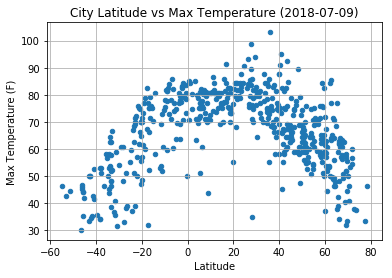

In [186]:
ax = city_data_df.plot.scatter( x = "Lat",
                                y = "Temp (F)",
                                title = "City Latitude vs Max Temperature (" + str(today) + ")" )
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.grid()
plt.show()


# Latitute vs. Humidity Plot

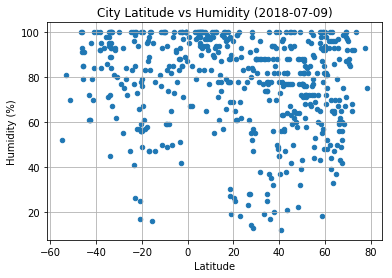

In [188]:
ax = city_data_df.plot.scatter(x = "Lat",
                          y = "Humidity",
                           title = "City Latitude vs Humidity (" + str(today) + ")")

ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.grid()
plt.show()

# Latitude vs. Cloudiness Plot

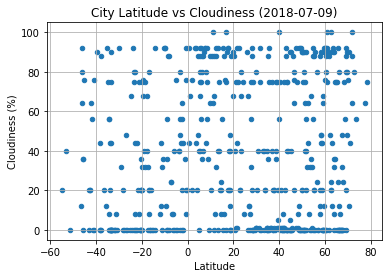

In [190]:
ax = city_data_df.plot.scatter(x = "Lat",
                          y = "Cloudiness",
                          title = "City Latitude vs Cloudiness (" + str(today) + ")")

ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.grid()
plt.show()

# Latitude vs. Wind Speed Plot

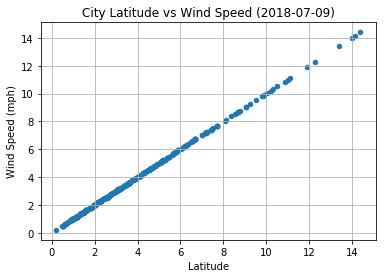

In [192]:
ax = city_data_df.plot.scatter(x = "Wind Speed",
                          y = "Wind Speed",
                          title = "City Latitude vs Wind Speed (" + str(today) + ")")

ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.grid()